### Definition

The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

### Parameters

eps:
- If the distance between two points is lower or equal to eps then they are considered neighbors.
- One way to find the eps value is based on the k-distance graph.

MinPts:
- Minimum number of neighbors (data points) within eps radius.
- The larger the dataset, the larger value of MinPts must be chosen.

In [1]:
import pandas as pd
from sklearn.datasets import load_wine,make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import (silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score,
                             calinski_harabasz_score, fowlkes_mallows_score, adjusted_mutual_info_score)
import numpy as np
import time

## Visualising the Wine dataset and Two moons dataset

### Data Scaling

In [2]:
# Load Wine Dataset
wine_data = load_wine()

X_wine = wine_data.data
y_wine = wine_data.target

# Scale Data
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

### Plotting Data

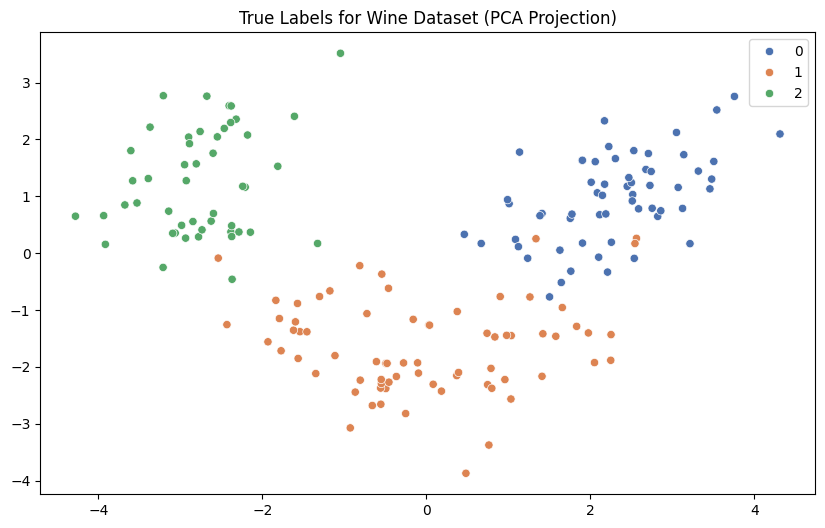

In [14]:
# PCA for dimensionality reduction (Wine dataset)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine_scaled)

plt.figure(figsize=(10, 6))

# Visualization of True Labels for Wine Dataset
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=y_wine, palette='deep', legend='full')
plt.title("True Labels for Wine Dataset (PCA Projection)")

plt.show()

## Clustering with DBSCAN

### Applying dbscan on wine dataset and two moons dataset

In [15]:
def metric_calculation(features, predicted_labels, true_labels):
    metrics = {}

    try:
        metrics['Adjusted Rand Index'] = adjusted_rand_score(true_labels, predicted_labels)
        metrics['V Measure Score'] = v_measure_score(true_labels, predicted_labels)
        metrics['Fowlkes-Mallows Index'] = fowlkes_mallows_score(true_labels, predicted_labels)
        metrics['Adjusted Mutual Info Score'] = adjusted_mutual_info_score(true_labels, predicted_labels)
        metrics['Silhouette Score'] = silhouette_score(features, predicted_labels)
        metrics['David Bouldin Score'] = davies_bouldin_score(features, predicted_labels)
        metrics['Calinski Harabasz Score'] = calinski_harabasz_score(features, predicted_labels)
    except Exception as e:
        print('\t', e)

    return metrics

In [16]:
def plotting_results(x, y, title, axes=None):
    x0 = [i[0] for i in x]
    x1 = [i[1] for i in x]

    df = pd.DataFrame.from_dict({'x1' : x0, 'x2': x1, 'label' : y})
    df["label"] = df["label"].astype(str)

    p = sns.scatterplot(ax=axes, data=df, x='x1', y='x2', hue='label', legend=None)
    if axes is not None:
        axes.set_title(title)
        if len(set(y)) > 5:
            plt.legend([], [], frameon=False)
    else:
        sns.scatterplot(data=df, x='x1', y='x2', hue='label', legend=None)
        plt.show()

    return

##### Changing Epsilon value for wine dataset

      Adjusted Rand Index  V Measure Score  Fowlkes-Mallows Index  Adjusted Mutual Info Score  Silhouette Score  David Bouldin Score  Calinski Harabasz Score  Number of clusters
eps                                                                                                                                                                              
0.60             0.152979         0.364257               0.468770                    0.353965          0.017004             1.218131                33.146754                   4
0.65             0.289349         0.458515               0.511008                    0.448204          0.201787             1.077958                63.359254                   5
0.70             0.404873         0.528698               0.576084                    0.518202          0.178760             1.230242                73.432930                   6
0.75             0.468346         0.563657               0.626165                    0.555686          0.30517

<Figure size 640x480 with 0 Axes>

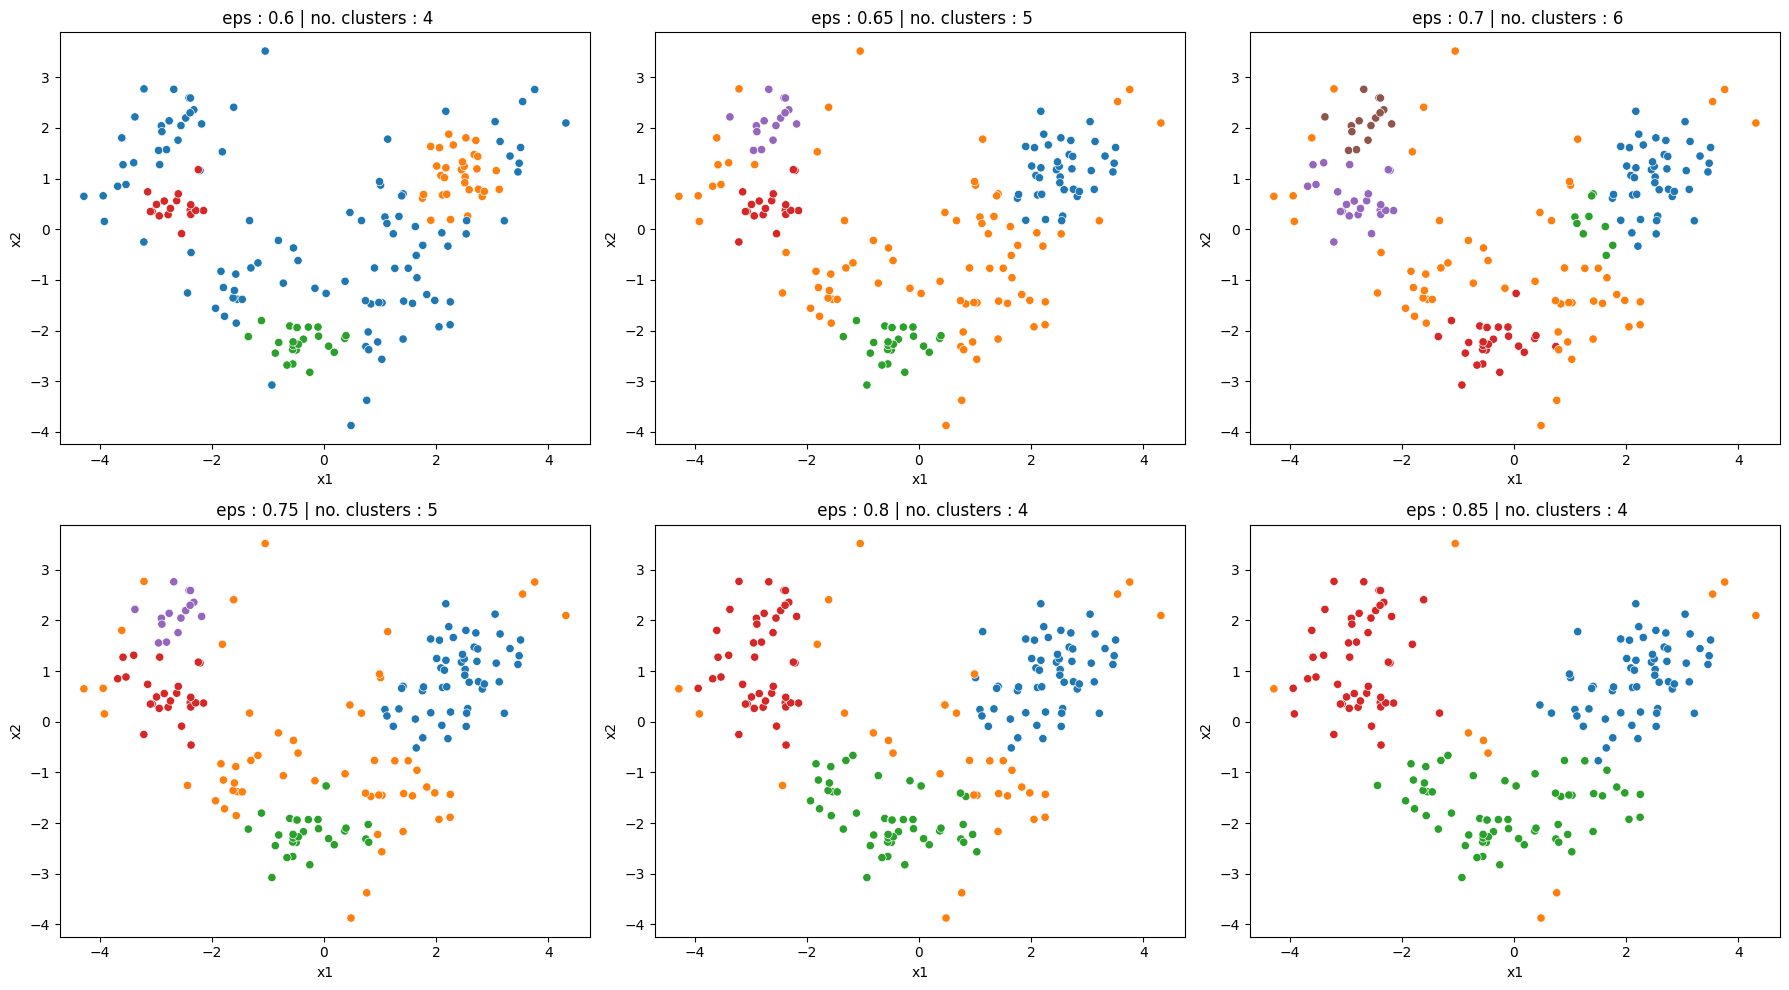

In [21]:
eps_space = [0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
results = []

plt.figure(1)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(len(eps_space)):
    eps = eps_space[i]

    clustering = DBSCAN(eps=eps, min_samples=15).fit(wine_pca)

    num = len(set(clustering.labels_))

    metrics = metric_calculation(wine_pca, clustering.labels_, y_wine)
    metrics['eps'] = eps
    metrics['Number of clusters'] = num

    results.append(metrics)

    plotting_results(wine_pca, clustering.labels_, f" eps : {eps} | no. clusters : {num}", axes[i // 3, i % 3])


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.set_index('eps')
print(metrics_df)

plt.tight_layout()
plt.show()

##### Changing Minimum points value

         Adjusted Rand Index  V Measure Score  Fowlkes-Mallows Index  Adjusted Mutual Info Score  Silhouette Score  David Bouldin Score  Calinski Harabasz Score  Number of clusters
min_pts                                                                                                                                                                             
13                  0.455967         0.569330               0.707743                    0.563310          0.372048             2.782123                78.639813                   3
14                  0.449235         0.556779               0.702923                    0.550704          0.392807             4.012173                71.355290                   3
15                  0.841603         0.801092               0.893534                    0.798040          0.504911             2.026897               161.348678                   4
16                  0.706297         0.713078               0.799427                    0.70896

<Figure size 640x480 with 0 Axes>

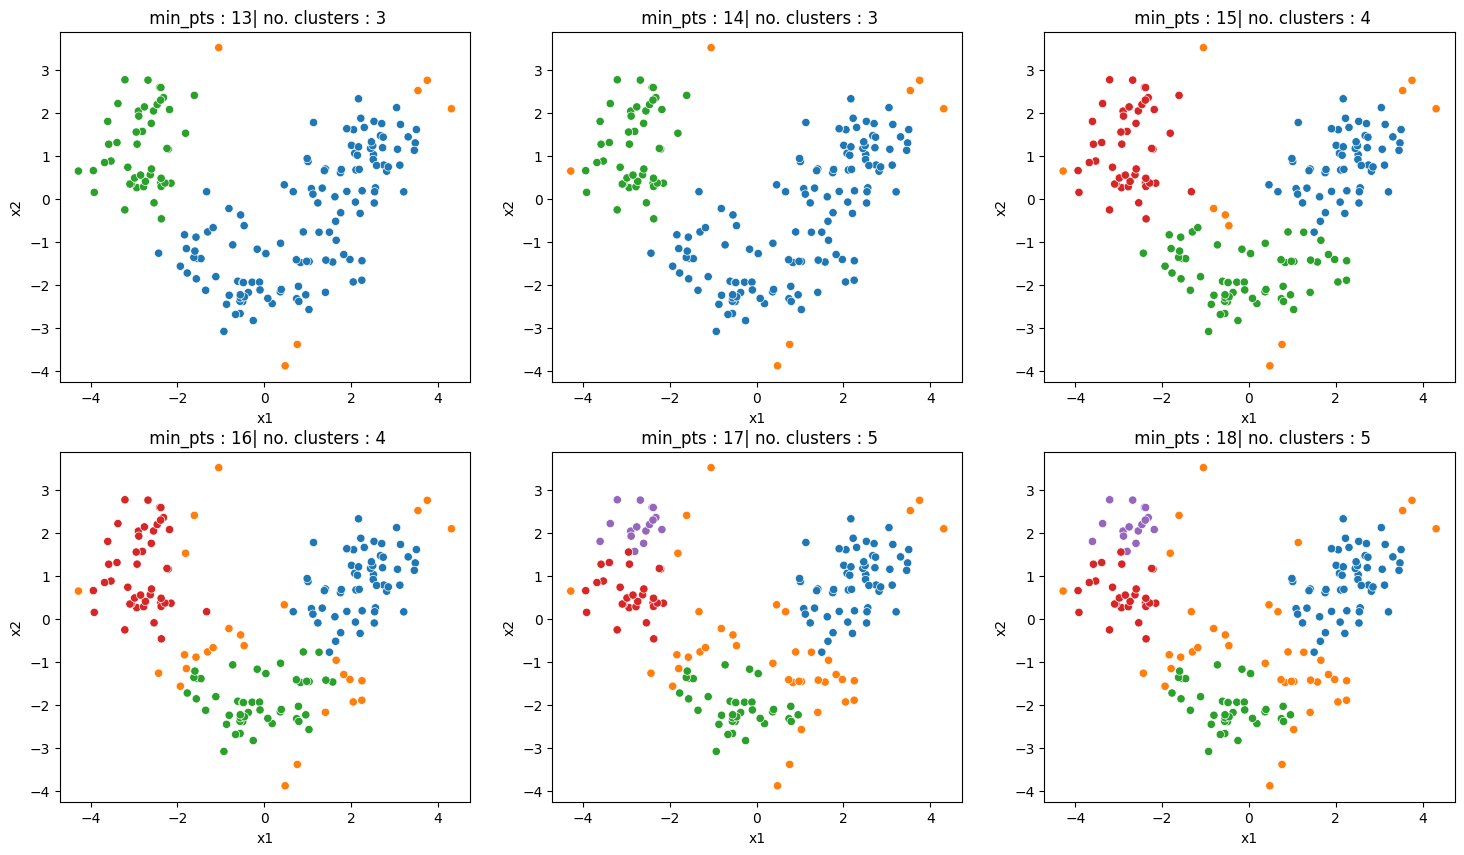

In [18]:
# Define min_samples values to test
min_sample_space = [13,14,15,16,17,18]
eps = 0.85
results = []

plt.figure(1)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(len(min_sample_space)):
    min_sample = min_sample_space[i]

    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(wine_pca)

    num = len(set(clustering.labels_))

    metrics = metric_calculation(wine_pca, clustering.labels_, y_wine)
    metrics['min_pts'] = min_sample
    metrics['Number of clusters'] = num

    results.append(metrics)

    plotting_results(wine_pca, clustering.labels_, f" min_pts : {min_sample}| no. clusters : {num}", axes[i//3, i%3])

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

metrics_df = pd.DataFrame(results)


metrics_df = metrics_df.set_index('min_pts')
print(metrics_df)

plt.show()

##### Changing Distance Metrics

	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
             Adjusted Rand Index  V Measure Score  Fowlkes-Mallows Index  Adjusted Mutual Info Score  Number of clusters  Silhouette Score  David Bouldin Score  Calinski Harabasz Score
dist_metric                                                                                                                                                                             
cosine                  0.000000         0.000000               0.581350                    0.000000                   1               NaN                  NaN                      NaN
euclidean               0.841603         0.801092               0.893534                    0.798040                   4          0.504911             2.026897               161.348678
manhattan               0.330470         0.488159               0.531242                    0.478637                   5          0.234288             1.174355                65.852682
ch

<Figure size 640x480 with 0 Axes>

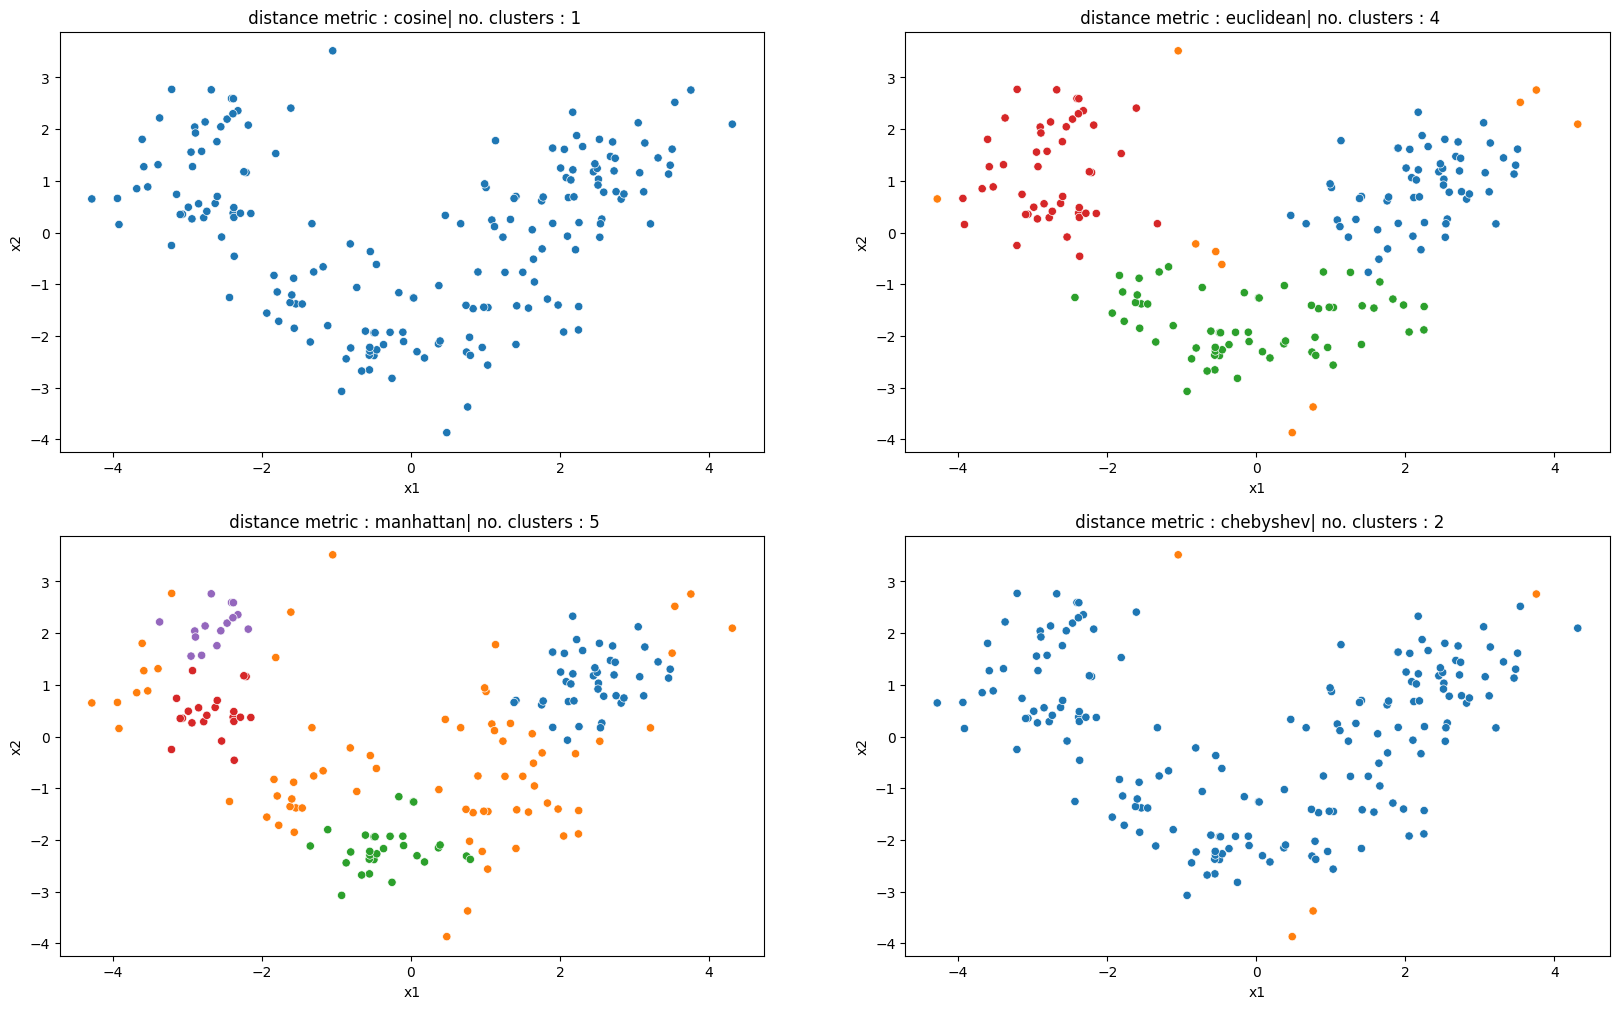

In [19]:
# Define distance metric values to test
dist_metrics = ['cosine','euclidean', 'manhattan', 'chebyshev']
eps = 0.85
min_samples=15
results = []

plt.figure(1)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for i in range(len(dist_metrics)):
    dist_metric = dist_metrics[i]
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=dist_metric).fit(wine_pca)
    num = len(set(clustering.labels_))

    metrics = metric_calculation(wine_pca, clustering.labels_, y_wine)
    metrics['dist_metric'] = dist_metric
    metrics['Number of clusters'] = num

    results.append(metrics)

    plotting_results(wine_pca, clustering.labels_, f" distance metric : {dist_metric}| no. clusters : {num}", axes[i//2, i%2])

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

metrics_df = pd.DataFrame(results)


metrics_df = metrics_df.set_index('dist_metric')
print(metrics_df)

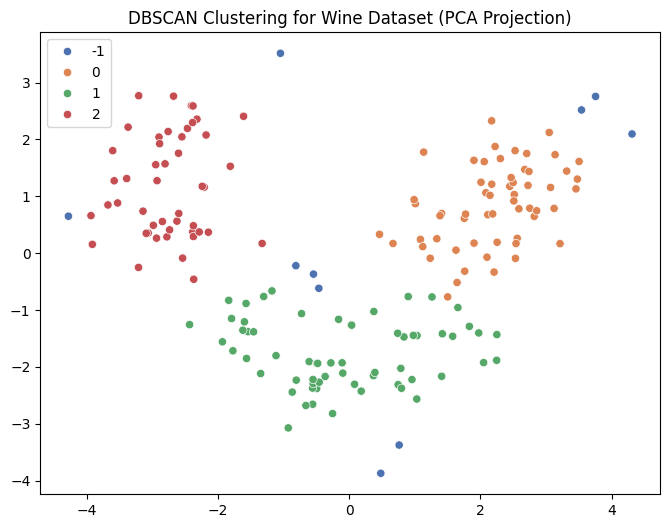

In [20]:
dbscan_wine = DBSCAN(eps=0.85, min_samples=15)
wine_dbscan_labels = dbscan_wine.fit_predict(wine_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=wine_dbscan_labels, palette='deep', legend='full')
plt.title("DBSCAN Clustering for Wine Dataset (PCA Projection)")
plt.show()